# Text reading and segmentation

In [1]:
import numpy as np
import jieba
import jieba.posseg as pseg

In [2]:
with open('romance_condor_heroes.txt', 'r') as f:
    data = list(f)

In [3]:
for s in data:
    print(len(s))

331551
263079
119938
240409


In [4]:
sentences = list()
for i in range(len(data)):
    sentences += data[i].replace(' ', '').replace('“', '').replace('，', '').replace('”', '')\
                 .replace('、', '').replace('！', '').replace('‘', '').replace('’', '').replace('：', '')\
                 .replace('？', '').replace('…', '').split('。')
len(sentences)

21623

In [5]:
sentences

['越女采蓮秋水畔窄袖輕羅暗露雙金釧',
 '照影摘花花似面芳心只共絲爭亂',
 '雞尺溪頭風浪晚霧重煙輕不見來時伴',
 '隱隱歌聲歸棹遠離愁引著江南岸',
 '一陣輕柔婉轉的歌聲飄在煙水蒙蒙的湖面上',
 '歌聲發自一艘小船之中船里五個少女和歌嘻笑蕩舟采蓮',
 '她們唱的曲子是北宋大詞人歐陽修所作的蝶戀花詞寫的正是越女蓮的情景雖只寥六十字但季節時辰所在景物以及越女的容貌衣著首飾心情無一不描繪得曆曆如見下半闋更是寫景中有敘事敘事中挾抒情自近而遠餘意不盡',
 '歐陽修在江南為官日久吳山越水柔情密意盡皆融入長短句中',
 '宋人不論達官貴人或是里巷小民無不以唱詞為樂是以柳永新詞一出有井水處皆歌而江南春岸折柳秋湖采蓮隨伴的往往便是歐詞',
 '時當南宋理宗年間地處嘉興南湖',
 '節近中秋荷葉漸殘蓮肉飽實',
 '這一陣歌聲傳入湖邊一個道姑耳中',
 '她在一排柳樹下悄立已久晚風拂動她杏黃色道袍的下擺拂動她頸中所插拂塵的萬縷柔絲心頭思潮起伏當真亦是芳心只共絲爭亂',
 '只聽得歌聲漸漸遠去唱的是歐陽修另一首蝶戀花詞一陣風吹來隱隱送來兩句風月無情人暗換舊游如夢空腸斷歌聲甫歇便是一陣格格嬌笑',
 '那道姑一聲長歎提起左手瞧著染滿了鮮血的手掌喃喃自語那又有甚麼好笑小妮子只是瞎唱渾不解詞中相思之苦惆悵之意',
 '在那道姑身後十餘丈處一個青袍長須的老者也是一悄直立不動只有當風月無情人暗換舊游如夢空腸斷那兩句傳到之時發出一聲極輕極輕的歎息',
 '小船在碧琉璃般的湖面上滑過舟中五個少女中三人十五六歲上下另外兩個都只九歲',
 '兩個幼女是中表之親表姊姓程單名一個英字表妹姓陸名無雙',
 '兩人相差半歲',
 '三個年長少女唱著歌兒將小舟從荷葉叢中蕩將出來',
 '程英道表妹你瞧這位老伯伯還在這兒',
 '說著伸手指向垂柳下的一人',
 '那人滿頭亂發胡須也是蓬蓬松松如刺猬一般須發油光烏黑照說年紀不大可是滿臉皺紋深陷卻似七八十歲老翁身穿藍布直綴頸中掛著個嬰兒所用的錦緞圍涎圍涎上繡著幅花貓撲蝶圖已然陳舊破爛',
 '陸無雙道這怪人在這兒坐了老半天啦怎麼動也不動程英道別叫怪人要叫老伯伯',
 '你叫他怪人他要生氣的',
 '陸無雙笑道他還不怪嗎這麼老了頭頸里卻掛了個圍涎',
 '他生了氣要是胡子都翹了起來那才好看呢',
 '從小舟中拿起一個蓮蓬往那人頭上擲去',
 '小舟與那怪客

In [6]:
sentences

['越女采蓮秋水畔窄袖輕羅暗露雙金釧',
 '照影摘花花似面芳心只共絲爭亂',
 '雞尺溪頭風浪晚霧重煙輕不見來時伴',
 '隱隱歌聲歸棹遠離愁引著江南岸',
 '一陣輕柔婉轉的歌聲飄在煙水蒙蒙的湖面上',
 '歌聲發自一艘小船之中船里五個少女和歌嘻笑蕩舟采蓮',
 '她們唱的曲子是北宋大詞人歐陽修所作的蝶戀花詞寫的正是越女蓮的情景雖只寥六十字但季節時辰所在景物以及越女的容貌衣著首飾心情無一不描繪得曆曆如見下半闋更是寫景中有敘事敘事中挾抒情自近而遠餘意不盡',
 '歐陽修在江南為官日久吳山越水柔情密意盡皆融入長短句中',
 '宋人不論達官貴人或是里巷小民無不以唱詞為樂是以柳永新詞一出有井水處皆歌而江南春岸折柳秋湖采蓮隨伴的往往便是歐詞',
 '時當南宋理宗年間地處嘉興南湖',
 '節近中秋荷葉漸殘蓮肉飽實',
 '這一陣歌聲傳入湖邊一個道姑耳中',
 '她在一排柳樹下悄立已久晚風拂動她杏黃色道袍的下擺拂動她頸中所插拂塵的萬縷柔絲心頭思潮起伏當真亦是芳心只共絲爭亂',
 '只聽得歌聲漸漸遠去唱的是歐陽修另一首蝶戀花詞一陣風吹來隱隱送來兩句風月無情人暗換舊游如夢空腸斷歌聲甫歇便是一陣格格嬌笑',
 '那道姑一聲長歎提起左手瞧著染滿了鮮血的手掌喃喃自語那又有甚麼好笑小妮子只是瞎唱渾不解詞中相思之苦惆悵之意',
 '在那道姑身後十餘丈處一個青袍長須的老者也是一悄直立不動只有當風月無情人暗換舊游如夢空腸斷那兩句傳到之時發出一聲極輕極輕的歎息',
 '小船在碧琉璃般的湖面上滑過舟中五個少女中三人十五六歲上下另外兩個都只九歲',
 '兩個幼女是中表之親表姊姓程單名一個英字表妹姓陸名無雙',
 '兩人相差半歲',
 '三個年長少女唱著歌兒將小舟從荷葉叢中蕩將出來',
 '程英道表妹你瞧這位老伯伯還在這兒',
 '說著伸手指向垂柳下的一人',
 '那人滿頭亂發胡須也是蓬蓬松松如刺猬一般須發油光烏黑照說年紀不大可是滿臉皺紋深陷卻似七八十歲老翁身穿藍布直綴頸中掛著個嬰兒所用的錦緞圍涎圍涎上繡著幅花貓撲蝶圖已然陳舊破爛',
 '陸無雙道這怪人在這兒坐了老半天啦怎麼動也不動程英道別叫怪人要叫老伯伯',
 '你叫他怪人他要生氣的',
 '陸無雙笑道他還不怪嗎這麼老了頭頸里卻掛了個圍涎',
 '他生了氣要是胡子都翹了起來那才好看呢',
 '從小舟中拿起一個蓮蓬往那人頭上擲去',
 '小舟與那怪客

In [7]:
sent_seg = list()
jieba.set_dictionary('dict.txt.big')

for i in range(len(sentences)):
    s = sentences[i]
    sent_seg.append(list(jieba.cut(s)))
sent_seg = np.array(sent_seg)
sent_seg.shape, sent_seg[11111]

Building prefix dict from /media/warrents/6A085EA7085E7255/GoogleDriveSync/WarrenTS/Code/Code/Python2.7/IPython_Notebooks/MachineLearning/pecu_course/Text_mining_LSTM/dict.txt.big ...
Loading model from cache /tmp/jieba.u86847c3b15d467aa53d8311fcf6be389.cache
Loading model cost 1.294 seconds.
Prefix dict has been built succesfully.


((21623,),
 ['楊過',
  '緩緩',
  '又',
  '翻',
  '了',
  '個',
  '身見',
  '郭靖',
  '仍',
  '無知覺',
  '於是',
  '繼續',
  '發出',
  '低微',
  '鼾聲',
  '一面',
  '走下',
  '床來'])

In [8]:
voca_count = dict()
for i in sent_seg:
    for j in i:
        if j in voca_count:
            voca_count[j] += 1
        else:
            voca_count[j] = 1
len(list(voca_count.keys()))

49934

# gensim

In [9]:
sent_seg[0]

['越女', '采蓮', '秋水', '畔', '窄', '袖', '輕羅暗', '露', '雙金釧']

In [11]:
import gensim as g
model = g.models.Word2Vec(sent_seg, window=5, size=1024, max_vocab_size=15000, min_count=1, iter=5)

In [12]:
len(model.wv.vocab)

12257

In [14]:
word2vec = dict()
vec = list()
vocas = list()
for voca in model.wv.vocab.keys():
    word2vec[voca] = model.wv.word_vec(voca)
    vocas.append(voca)
    vec.append(model.wv.word_vec(voca))
word2vec['<unknown>'] = np.zeros_like(word2vec['小心'])

np.save('word2vec_gensim', word2vec)

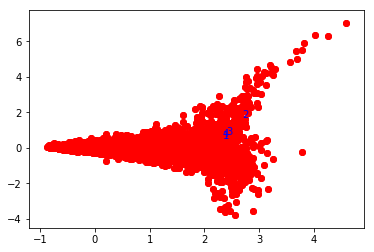

In [16]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

v = np.array(vocas)
pca = PCA(n_components=2)
vec_pca = pca.fit_transform(vec)
'''
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
ax.scatter(vec_pca[:, 0], vec_pca[:, 1], vec_pca[:, 2], c='r')
vec_pca = list(vec_pca)
v11 = vec_pca[np.argwhere(v=='郭靖')[0][0]]
ax.text(x=v11[0], y=v11[1], z=v11[2], s='1', color='b')
v12 = vec_pca[np.argwhere(v=='黃蓉')[0][0]]
ax.text(x=v12[0], y=v12[1], z=v12[2], s='2', color='b')
v21 = vec_pca[np.argwhere(v=='楊過')[0][0]]
ax.text(x=v21[0], y=v21[1], z=v21[2], s='3', color='b')
v22 = vec_pca[np.argwhere(v=='小龍女')[0][0]]
ax.text(x=v22[0], y=v22[1], z=v22[2], s='4', color='b')
'''
plt.figure(0)
plt.scatter(vec_pca[:, 0], vec_pca[:, 1], c='r')
vec_pca = list(vec_pca)
v11 = vec_pca[np.argwhere(v=='郭靖')[0][0]]
plt.text(x=v11[0], y=v11[1], s='1', color='b')
v12 = vec_pca[np.argwhere(v=='黃蓉')[0][0]]
plt.text(x=v12[0], y=v12[1], s='2', color='b')
v21 = vec_pca[np.argwhere(v=='楊過')[0][0]]
plt.text(x=v21[0], y=v21[1], s='3', color='b')
v22 = vec_pca[np.argwhere(v=='小龍女')[0][0]]
plt.text(x=v22[0], y=v22[1], s='4', color='b')
plt.show()

In [17]:
np.argwhere(v=='郭靖')[0][0], np.argwhere(v=='黃蓉')[0][0], np.argwhere(v=='楊過')[0][0], np.argwhere(v=='小龍女')[0][0]

(4508, 2097, 6791, 6169)

In [18]:
vec_pca[4590], vec_pca[869], vec_pca[6586]

(array([-0.70052825,  0.04031622]),
 array([ 1.05071531, -0.13021169]),
 array([-0.55337191, -0.05543522]))

In [19]:
np.mean(word2vec['小心']), np.std(word2vec['小心'])

(0.00068955962, 0.078523315)

In [20]:
word2vec['小心'].shape

(1024,)

In [14]:
# romance vectors
romance_vec = list()
for i in range(len(sent_seg)):
    s = list()
    for j in range(len(sent_seg[i])):
        if sent_seg[i][j] in word2vec:
            vec = word2vec[sent_seg[i][j]]
        else:
            vec = word2vec['<unknown>']
        s.append(list(vec))
    romance_vec.append(s)
#romance_vec = np.array(romance_vec)
#np.save('romance_vec_gensim', romance_vec)

In [16]:
type(romance_vec), type(romance_vec[0]), type(romance_vec[0][0])

(list, list, list)

In [ ]:
#np.save('romance_vec_gensim', romance_vec)

In [132]:
romance_vec[0]

[[0.35327777,
  0.42540255,
  -1.1792471,
  -0.2073072,
  0.17414093,
  -0.22217552,
  0.21540347,
  0.79430574,
  -0.23101328,
  -1.1332172,
  0.48145586,
  0.39594498,
  1.2818429,
  1.011175,
  -0.2694321,
  0.13478364,
  -0.49467373,
  0.23584093,
  0.20773453,
  -0.93948096,
  -1.0265952,
  1.0649565,
  -0.40510046,
  0.8076812,
  -0.12689127,
  -0.16700189,
  -0.53598785,
  -0.83761132,
  -0.66464466,
  -0.046043538,
  -0.93101829,
  0.1240785,
  -1.2633531,
  -0.36658952,
  -0.011757703,
  0.26431945,
  0.19791074,
  -0.29506373,
  -0.70916831,
  0.64662516,
  -0.21659245,
  -1.175674,
  0.21538368,
  -0.032595325,
  -1.210835,
  0.20789143,
  0.73884231,
  0.61059922,
  -1.2715691,
  -0.10642699,
  0.55237609,
  -2.0887949,
  -0.38740841,
  -1.5036087,
  0.022331659,
  -0.12653223,
  -0.79133296,
  -0.36933833,
  -0.29760188,
  -0.33788794,
  -0.32653785,
  0.19774608,
  -0.85283375,
  -0.19896193,
  -0.53994143,
  -0.75379211,
  -0.81873965,
  -0.09514305,
  1.1981518,
  -0.40

In [27]:
!nvidia-smi

Wed Jan  3 22:33:18 2018       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 375.66                 Driver Version: 375.66                    |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  GeForce GTX 106...  Off  | 0000:01:00.0      On |                  N/A |
| 51%   64C    P2    93W / 120W |   5838MiB /  6071MiB |     78%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [26]:
!free -m

              total        used        free      shared  buff/cache   available
Mem:          15968        6852        7061         223        2055        8516
Swap:         16302          25       16277


In [28]:
'123' is '123'

True